# Customer Churn Prediction


A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank.
Your task as a data scientist would be to predict the propensity to churn for each customer.




<b>Importing the required libraries

In [315]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

 <b>Importing the dataset 

In [289]:
df = pd.read_csv('churn_prediction.csv')

<b>Displaying the first five rows of the dataset

In [290]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [ ]:
There are multiple variables in the dataset which can be cleanly divided into 3 categories:
    
    
I. Demographic information about customers

•	customer_id - Customer id 
•	vintage - Vintage of the customer with the bank in a number of days 
•	age - Age of customer 
•	gender - Gender of customer 
•	dependents - Number of dependents 
•	occupation - Occupation of the customer 
•	city - City of the customer (anonymized) 


II. Customer Bank Relationship

•	customer_nw_category - Net worth of customer (3: Low 2: Medium 1: High) 
•	branch_code - Branch Code for a customer account 
•	days_since_last_transaction - No of Days Since Last Credit in Last 1 year 


III. Transactional Information

•	current_balance - Balance as of today 
•	previous_month_end_balance - End of Month Balance of previous month 
•	average_monthly_balance_prevQ - Average monthly balances (AMB) in Previous Quarter 
•	average_monthly_balance_prevQ2 - Average monthly balances (AMB) in previous to the previous quarter 
•	current_month_credit - Total Credit Amount current month 
•	previous_month_credit - Total Credit Amount previous month 
•	current_month_debit - Total Debit Amount current month 
•	previous_month_debit - Total Debit Amount previous month 
•	current_month_balance - Average Balance of current month 
•	previous_month_balance - Average Balance of previous month 
•	churn - Average balance of customer falls below minimum balance in the next quarter (1/0) 


<b>Displaying the number of rows and columns

In [291]:
rows = df.shape[0]
columns = df.shape[1]
print("Total number of rows in the dataframe: ", rows)
print("Total number of columns in the dataframe: ", columns)

Total number of rows in the dataframe:  28382
Total number of columns in the dataframe:  21


<b>Displaying the column names

In [292]:
print("Column No. \t Column Name")
for i, column in enumerate(df.columns):
    print(i, " \t\t", column)

Column No. 	 Column Name
0  		 customer_id
1  		 vintage
2  		 age
3  		 gender
4  		 dependents
5  		 occupation
6  		 city
7  		 customer_nw_category
8  		 branch_code
9  		 days_since_last_transaction
10  		 current_balance
11  		 previous_month_end_balance
12  		 average_monthly_balance_prevQ
13  		 average_monthly_balance_prevQ2
14  		 current_month_credit
15  		 previous_month_credit
16  		 current_month_debit
17  		 previous_month_debit
18  		 current_month_balance
19  		 previous_month_balance
20  		 churn


<b>We observe that the columns 'gender' and 'occupation' have categorical values. So, we will transform them into continous values.

In [293]:
#Creating dummy values of gender and concatenating them into the dataframe
gender_dummies = pd.get_dummies(df.gender)
df = pd.concat([df, gender_dummies], axis = 1)
df = df.drop(['gender'], axis = 1)

In [294]:
#Creating dummy values of occupation and concatenating them into the dataframe
occupation_dummies = pd.get_dummies(df.occupation)
df = pd.concat([df, occupation_dummies], axis = 1)
df = df.drop(['occupation'], axis = 1)

In [295]:
df.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,Female,Male,company,retired,salaried,self_employed,student
0,1,3135,66,0.0,187.0,2,755,224.0,1458.71,1458.71,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,2,310,35,0.0,NaN,2,3214,60.0,5390.37,8704.66,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,4,2356,31,0.0,146.0,2,41,NaN,3913.16,5815.29,...,5006.28,5070.14,0,0,1,0,0,1,0,0
3,5,478,90,NaN,1020.0,2,582,147.0,2291.91,2291.91,...,2291.91,1669.79,1,0,0,0,0,0,1,0
4,6,2531,42,2.0,1494.0,3,388,58.0,927.72,1401.72,...,1157.15,1677.16,1,0,1,0,0,0,1,0


<b>Now, we move on to see the description of the dataset.

In [296]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,Female,Male,company,retired,salaried,self_employed,student
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,...,2.838200e+04,2.838200e+04,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,...,7.451133e+03,7.495177e+03,0.185329,0.398457,0.583046,0.001409,0.071313,0.236206,0.615742,0.072511
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,...,4.203394e+04,4.243198e+04,0.388571,0.489589,0.493064,0.037515,0.257351,0.424758,0.486428,0.259336
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,...,-3.374180e+03,-5.171920e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,...,1.996765e+03,2.074408e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,...,3.447995e+03,3.465235e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,...,6.667958e+03,6.654693e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,...,5.778185e+06,5.720144e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We see that the counts of some of the features differs from the total number of rows. So, we proceed in counting the NaN values.

In [297]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
dependents                        2463
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
Female                               0
Male                                 0
company                              0
retired                              0
salaried                             0
self_employed                        0
student                  

<b>We observe that the columns: dependents, city and days_since_last transaction have significant number of NaN values. If we drop the rows, we may lose valuable information. Alternatively, we can replace them with the mean or the mode of the respective columns

In [298]:
#We will first replace the NaN values of the 'dependents' with the median.

dependents = df[df["dependents"]!=np.nan]["dependents"]
df["dependents"] = df["dependents"].fillna(dependents.median())

In [299]:
#We will first replace the NaN values of the 'city' with 0.

df["city"] = df["city"].fillna(0)

In [300]:
#We will first replace the NaN values of the 'days_since_last_transaction' with the median.

days_since_last_transaction_array = df[df["days_since_last_transaction"]!=np.nan]["days_since_last_transaction"]
df["days_since_last_transaction"] = df["days_since_last_transaction"].fillna(days_since_last_transaction_array.median())

In [301]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
dependents                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
Female                            0
Male                              0
company                           0
retired                           0
salaried                          0
self_employed                     0
student                           0
dtype: int64

<b>We have successfully replaced the NaN values. 

<b>Now, we store our dependent or target data, 'churn' in variable Y.

In [302]:
Y = df['churn']
Y.head()

0    0
1    0
2    0
3    1
4    1
Name: churn, dtype: int64

<b>We store the independent features in variable X

In [303]:
X = df.drop('churn', axis = 1)
X.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,previous_month_debit,current_month_balance,previous_month_balance,Female,Male,company,retired,salaried,self_employed,student
0,1,3135,66,0.0,187.0,2,755,224.0,1458.71,1458.71,...,0.20,1458.71,1458.71,0,1,0,0,0,1,0
1,2,310,35,0.0,0.0,2,3214,60.0,5390.37,8704.66,...,100.56,6496.78,8787.61,0,1,0,0,0,1,0
2,4,2356,31,0.0,146.0,2,41,30.0,3913.16,5815.29,...,259.23,5006.28,5070.14,0,1,0,0,1,0,0
3,5,478,90,0.0,1020.0,2,582,147.0,2291.91,2291.91,...,2143.33,2291.91,1669.79,0,0,0,0,0,1,0
4,6,2531,42,2.0,1494.0,3,388,58.0,927.72,1401.72,...,1538.06,1157.15,1677.16,0,1,0,0,0,1,0


<b>We will now normalise our data using Standard Scaler

In [305]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.73130444,  0.47864443,  0.99914719, -0.33087694, -1.31330605,
        -0.34148912, -0.18231839,  1.92702681, -0.13901702, -0.14195297,
        -0.1447094 , -0.12731657, -0.04454454, -0.10985766, -0.07037759,
        -0.13742664, -0.14256405, -0.14226472, -0.81387401,  0.84565462,
        -0.03756771, -0.27710798, -0.55610576,  0.78997206, -0.27960617],
       [-1.73119011, -1.27590918, -0.74175593, -0.33087694, -1.73198022,
        -0.34148912,  2.4398245 , -0.0663119 , -0.04672012,  0.02842533,
         0.00724929,  0.118793  , -0.04453987, -0.10984553,  0.03515519,
        -0.13329672, -0.02270474,  0.03045947, -0.81387401,  0.84565462,
        -0.03756771, -0.27710798, -0.55610576,  0.78997206, -0.27960617],
       [-1.73096144, -0.00517761, -0.96638859, -0.33087694, -1.40510092,
        -0.34148912, -0.94368888, -0.43094703, -0.08139807, -0.03951413,
        -0.06199113, -0.09665209, -0.04453922, -0.10984385,  0.04593648,
        -0.12676727, -0.0581648 , -0.05715217, -0

<b>Splitting the datasets into train data and test data

In [306]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (22705, 25) (22705,)
Test set: (5677, 25) (5677,)


# K Nearest Neighbours Classification 

<b>We will build our first classification model to predict the churn using KNN Algorithm.

In [307]:
from sklearn.neighbors import KNeighborsClassifier

In [308]:
#We first set the k of our model to be 4
k = 4 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

<b>We will now test the accuaracy of your model by using metrics from sklearn

In [310]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

Train set Accuracy:  0.8310504294208324
Test set Accuracy:  0.8002466091245376


<b>We now vary the value of k to find the model with best accuracy

In [312]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.72626387, 0.79337678, 0.7755857 , 0.80024661, 0.79108684,
       0.8023604 , 0.79830897, 0.80500264, 0.803065  ])

<b>We will now plot the accuracies to find out the optimal value of k

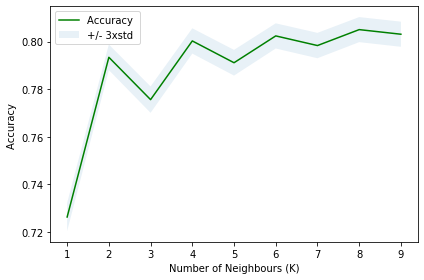

In [316]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [317]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.80500264224062 with k= 8


<b>Thus, we can conclude that K = 8 gives us the optimum model

In [319]:
#We now set the k of our model to be 8
k = 8 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [320]:
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

Train set Accuracy:  0.8209205020920503
Test set Accuracy:  0.80500264224062


# Logistic Regression

<b>We will build our second classification model to predict the churn using Logistic Regression Algorithm.

In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [323]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [324]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.83218391, 0.16781609],
       [0.7673314 , 0.2326686 ],
       [0.79615105, 0.20384895],
       ...,
       [0.80690161, 0.19309839],
       [0.77256825, 0.22743175],
       [0.81930515, 0.18069485]])

In [326]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Y_test, yhat)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.8102871234807116

In [328]:
from sklearn.metrics import log_loss
log_loss(Y_test, yhat_prob)

0.4723372048080533

<b>We will now make the classification report, confusion matrix and plot it.

In [329]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, yhat, labels=[1,0]))

[[  26 1059]
 [  18 4574]]


Confusion matrix, without normalization
[[  26 1059]
 [  18 4574]]


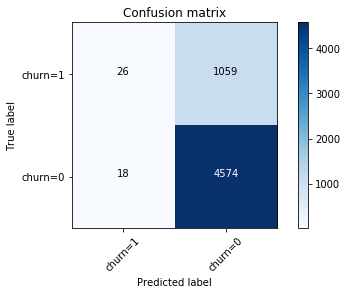

In [330]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [331]:
print (classification_report(Y_test, yhat))


              precision    recall  f1-score   support

           0       0.81      1.00      0.89      4592
           1       0.59      0.02      0.05      1085

    accuracy                           0.81      5677
   macro avg       0.70      0.51      0.47      5677
weighted avg       0.77      0.81      0.73      5677



# Decision Tree

<b>We will build our third classification model to predict the churn using Decision Tree Algorithm.

In [390]:
from sklearn.tree import DecisionTreeClassifier
#We set the max_depth of the tree as 6
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [367]:
Tree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [368]:
predTree = Tree.predict(X_test)

print (predTree [0:5])
print (Y_test [0:5])

[0 0 0 1 1]
9570     1
10763    0
10084    1
7516     1
15587    1
Name: churn, dtype: int64


In [369]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predTree))

DecisionTrees's Accuracy:  0.8553813633961599


<b>We will now plot the decision tree

In [372]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


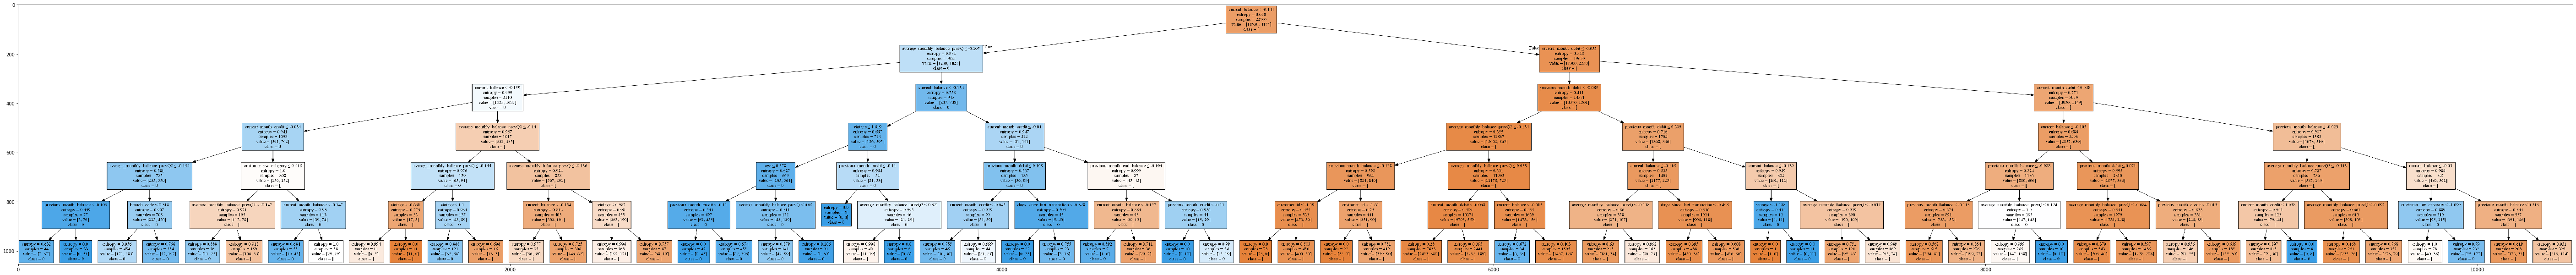

In [388]:
dot_data = StringIO()
filename = "churntree.png"
featureNames = df.drop('churn', axis = 1).columns
targetNames = Y.unique().tolist()
out = tree.export_graphviz(Tree, feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(Y_train)), filled=True,  special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')








<b>
    
    
    
    
    
    
    
    
    
    
    
    
    Thus, we have successfully built 3 classification models, K Nearest Neighbours, Logistic Regression and Decision Tree respectively and computed their accuracy to predict whether a customer will churn or not.